In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [3]:
# can be EVSE_ID, LOCATION_ID, etc
GROUP_LEVEL = 'EVSE_ID'
GROUP_LEVEL = 'LOCATION_ID'

In [35]:
df = pd.read_csv('C:/Users/tijmen.vanetten/Documents/emobility-vanetten/data/processed/sessions_data.csv')

In [60]:
df.columns

Index(['Unnamed: 0', 'SESSION_ID', 'LOCATION_ID', 'GEO_ID', 'GEO_STRING',
       'GEO_NAME', 'LOCATION_SUB_TYPE', 'CHARGEPOINT_ID', 'CONNECTOR_ID',
       'POWER_TYPE', 'POWER_KW', 'EVSE_ID', 'CUSTOMER_TYPE', 'SESSION_START',
       'SESSION_STOP', 'SESSION_DURATION_SECONDS', 'ENERGY_DELIVERED_KWH',
       'COST_GROSS', 'DATE'],
      dtype='object')

In [36]:
df = df[df['LOCATION_SUB_TYPE'] == 'On Forecourt']

In [37]:
len(df)

476639

In [39]:
df.groupby('LOCATION_SUB_TYPE').count()

,Unnamed: 0,SESSION_ID,LOCATION_ID,GEO_ID,GEO_STRING,GEO_NAME,CHARGEPOINT_ID,CONNECTOR_ID,POWER_TYPE,POWER_KW,EVSE_ID,CUSTOMER_TYPE,SESSION_START,SESSION_STOP,SESSION_DURATION_SECONDS,ENERGY_DELIVERED_KWH,COST_GROSS,DATE
LOCATION_SUB_TYPE,,,,,,,,,,,,,,,,,,
On Forecourt,476639,476639,476639,476639,476639,476639,476639,476639,476639,476639,476639,292909,476639,476639,476639,476639,476639,476639


In [40]:
df.groupby('LOCATION_SUB_TYPE')['LOCATION_ID'].nunique()

LOCATION_SUB_TYPE
On Forecourt    113
Name: LOCATION_ID, dtype: int64

In [41]:
df.isna().sum()

Unnamed: 0                       0
SESSION_ID                       0
LOCATION_ID                      0
GEO_ID                           0
GEO_STRING                       0
GEO_NAME                         0
LOCATION_SUB_TYPE                0
CHARGEPOINT_ID                   0
CONNECTOR_ID                     0
POWER_TYPE                       0
POWER_KW                         0
EVSE_ID                          0
CUSTOMER_TYPE               183730
SESSION_START                    0
SESSION_STOP                     0
SESSION_DURATION_SECONDS         0
ENERGY_DELIVERED_KWH             0
COST_GROSS                       0
DATE                             0
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476639 entries, 0 to 518015
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                476639 non-null  int64  
 1   SESSION_ID                476639 non-null  int64  
 2   LOCATION_ID               476639 non-null  int64  
 3   GEO_ID                    476639 non-null  int64  
 4   GEO_STRING                476639 non-null  object 
 5   GEO_NAME                  476639 non-null  object 
 6   LOCATION_SUB_TYPE         476639 non-null  object 
 7   CHARGEPOINT_ID            476639 non-null  object 
 8   CONNECTOR_ID              476639 non-null  int64  
 9   POWER_TYPE                476639 non-null  object 
 10  POWER_KW                  476639 non-null  float64
 11  EVSE_ID                   476639 non-null  int64  
 12  CUSTOMER_TYPE             292909 non-null  object 
 13  SESSION_START             476639 non-null  o

In [43]:
df[['SESSION_DURATION_SECONDS', 'ENERGY_DELIVERED_KWH']].describe()

,SESSION_DURATION_SECONDS,ENERGY_DELIVERED_KWH
count,476639.000000,476639.000000
mean,2339.086197,23.518061
std,1557.849915,15.220795
min,0.000000,0.500000
25%,1306.000000,11.900000
50%,2107.000000,21.100000
75%,3070.000000,32.168000
max,178124.000000,112.313000


In [44]:
df.head()

,Unnamed: 0,SESSION_ID,LOCATION_ID,GEO_ID,GEO_STRING,GEO_NAME,LOCATION_SUB_TYPE,CHARGEPOINT_ID,CONNECTOR_ID,POWER_TYPE,POWER_KW,EVSE_ID,CUSTOMER_TYPE,SESSION_START,SESSION_STOP,SESSION_DURATION_SECONDS,ENERGY_DELIVERED_KWH,COST_GROSS,DATE
0,0,220018,141205,21156,N78,London,On Forecourt,GBALLEGO000110,315474,DC,50.0,285108,NaN,2020-01-29 22:50:00,2020-01-29 22:53:00,218,2.06,0.80000,2020-01-29
1,1,223021,141205,21156,N78,London,On Forecourt,GBALLEGO000110,315474,DC,50.0,285108,NaN,2020-02-08 11:12:00,2020-02-08 11:42:00,1773,12.52,4.89000,2020-02-08
2,2,303383,141205,21156,N78,London,On Forecourt,GBALLEGO000110,315473,DC,50.0,285108,B2C,2020-08-15 05:37:00,2020-08-15 05:49:00,677,7.16,2.66352,2020-08-15
3,3,249770,141205,21156,N78,London,On Forecourt,GBALLEGO000110,315473,DC,50.0,285108,NaN,2020-05-09 08:36:00,2020-05-09 08:49:00,821,5.67,2.21000,2020-05-09
4,4,216518,141205,21156,N78,London,On Forecourt,GBALLEGO000110,315474,DC,50.0,285108,NaN,2020-01-19 12:26:00,2020-01-19 13:03:00,2235,13.80,5.39000,2020-01-19


In [45]:
no_locations = df[GROUP_LEVEL].nunique()
print(f"There are {no_locations} unique charging locations in total based on {GROUP_LEVEL}.")

There are 113 unique charging locations in total based on LOCATION_ID.


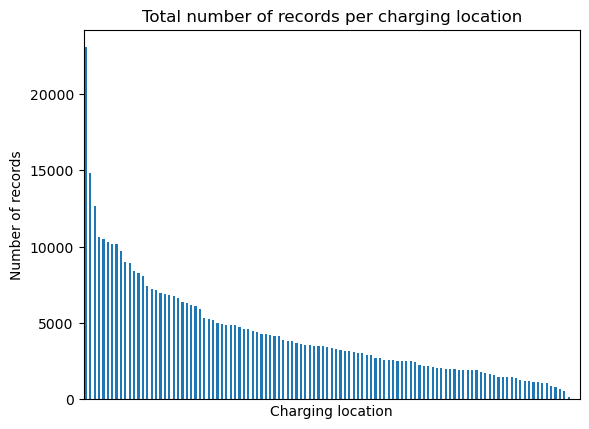

In [46]:
ax = df.groupby([GROUP_LEVEL]).size().sort_values(ascending=False).plot.bar()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) #
plt.ylabel('Number of records')
plt.xlabel('Charging location')
plt.title('Total number of records per charging location')
plt.show()

In [47]:
# aggregate to daily delivery
df_daily = df.groupby([GROUP_LEVEL, 'DATE']).sum('ENERGY_DELIVERED_KWH')
df_locations = df_daily.groupby(GROUP_LEVEL)

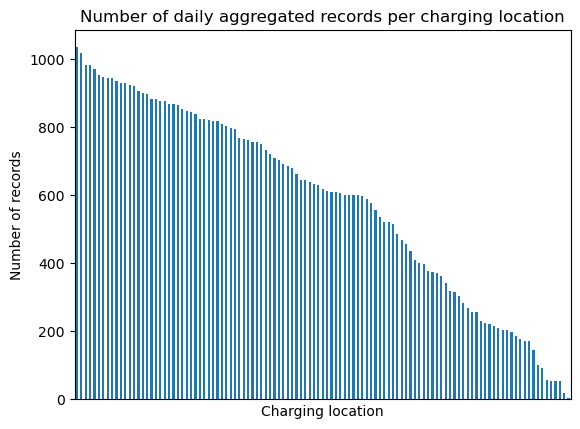

In [48]:
ax = df_locations.size().sort_values(ascending=False).reset_index()[0].plot.bar()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) #
plt.ylabel('Number of records')
plt.xlabel('Charging location')
plt.title('Number of daily aggregated records per charging location')
plt.show()


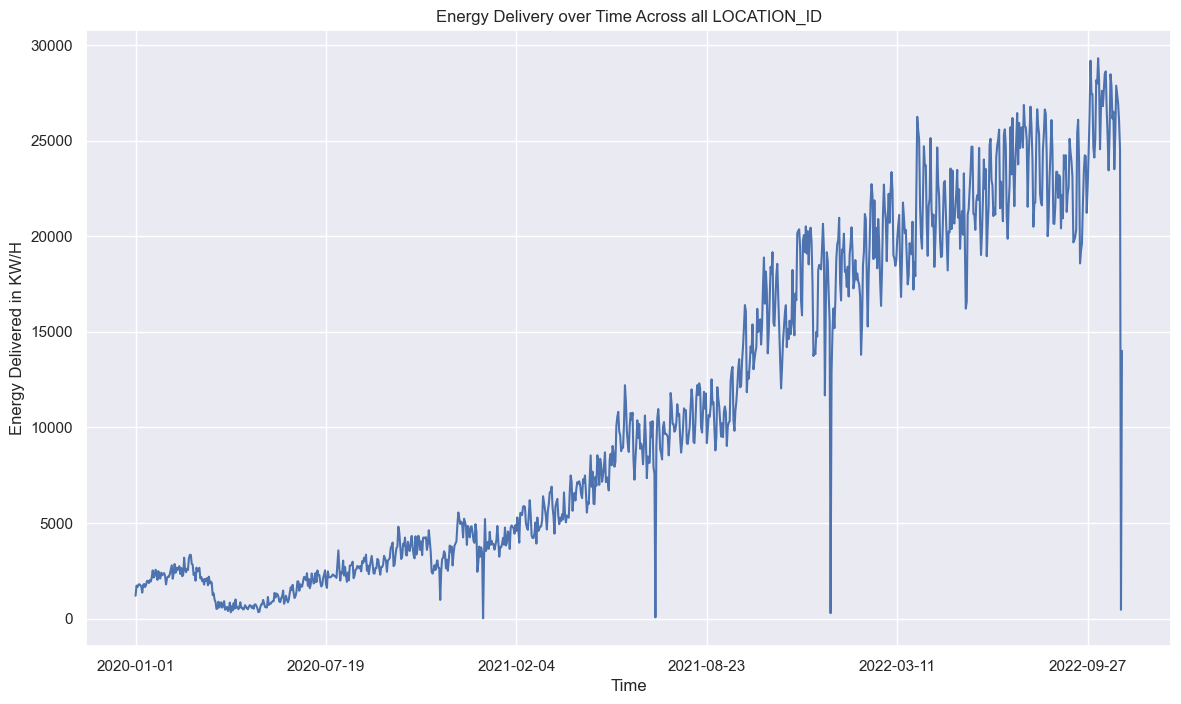

In [49]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=df_daily.groupby('DATE').sum("ENERGY_DELIVERED_KWH"), x ='DATE', y = 'ENERGY_DELIVERED_KWH')

ax.xaxis.set_major_locator(ticker.AutoLocator())
plt.ylabel('Energy Delivered in KW/H')
plt.xlabel('Time')
plt.title(f"Energy Delivery over Time Across all {GROUP_LEVEL}")
plt.show()

In [50]:
df_daily.groupby('DATE').sum("ENERGY_DELIVERED_KWH").sort_values('ENERGY_DELIVERED_KWH')

,Unnamed: 0,SESSION_ID,GEO_ID,CONNECTOR_ID,POWER_KW,EVSE_ID,SESSION_DURATION_SECONDS,ENERGY_DELIVERED_KWH,COST_GROSS
DATE,,,,,,,,,
2020-12-31,2801,614444,21156,315474,50.0,285108,2192,20.550,7.644600
2021-06-30,73611,20167417,66468,1421882,143.0,1089142,12830,66.540,22.623600
2021-12-31,800967,229323128,292977,13349911,1225.0,13481690,31417,286.998,116.337141
2020-04-10,481537,5674096,464344,7257851,1208.0,6557932,58485,334.810,120.627340
2020-05-09,719146,6744954,502352,8521045,1615.0,7698695,52635,340.265,130.126580
...,...,...,...,...,...,...,...,...,...
2022-10-21,223260024,32753215583,23994899,1437143276,126866.0,1519649724,2547338,28476.390,19520.850000
2022-10-15,223016814,31553795814,23293681,1494090907,125792.0,1584614509,2601211,28511.216,15835.640000
2022-10-16,218252361,31283972702,23034039,1431575006,123029.0,1512916767,2507847,28627.368,15869.360000


In [51]:
locations_ordered_daily_energy_sum = df_locations.mean().sort_values('ENERGY_DELIVERED_KWH', ascending=False)

In [52]:
locations_ordered_daily_energy_sum

,Unnamed: 0,SESSION_ID,GEO_ID,CONNECTOR_ID,POWER_KW,EVSE_ID,SESSION_DURATION_SECONDS,ENERGY_DELIVERED_KWH,COST_GROSS
LOCATION_ID,,,,,,,,,
764838,1.343147e+07,9.206136e+08,774045.800000,8.708230e+07,7821.644444,1.187581e+08,97796.680000,1379.836907,739.589986
1005996,7.755338e+06,6.436887e+08,644107.531034,6.935485e+07,4334.689655,6.686165e+07,58843.931034,754.831303,429.239241
764382,5.202966e+06,4.475759e+08,573180.984962,4.701532e+07,4258.157895,3.490142e+07,43172.245614,677.904108,347.378856
764650,4.860050e+06,4.046837e+08,536858.390000,4.549817e+07,3773.000000,6.208713e+07,60308.453333,662.426692,329.468820
1146582,5.962684e+06,5.439731e+08,383472.962963,5.990980e+07,3234.259259,4.917367e+07,49014.129630,565.425463,349.917037
...,...,...,...,...,...,...,...,...,...
409698,6.129619e+05,6.735650e+07,94612.059615,5.118455e+06,206.592308,3.674060e+06,10145.601923,48.724437,20.032026
141223,1.108111e+05,2.571120e+07,55593.072682,9.861801e+05,149.362155,8.911112e+05,6502.352130,38.724784,15.111488
141229,4.851179e+04,1.691898e+07,41631.835544,5.750242e+05,90.315650,5.195852e+05,3784.090186,35.518862,13.587263


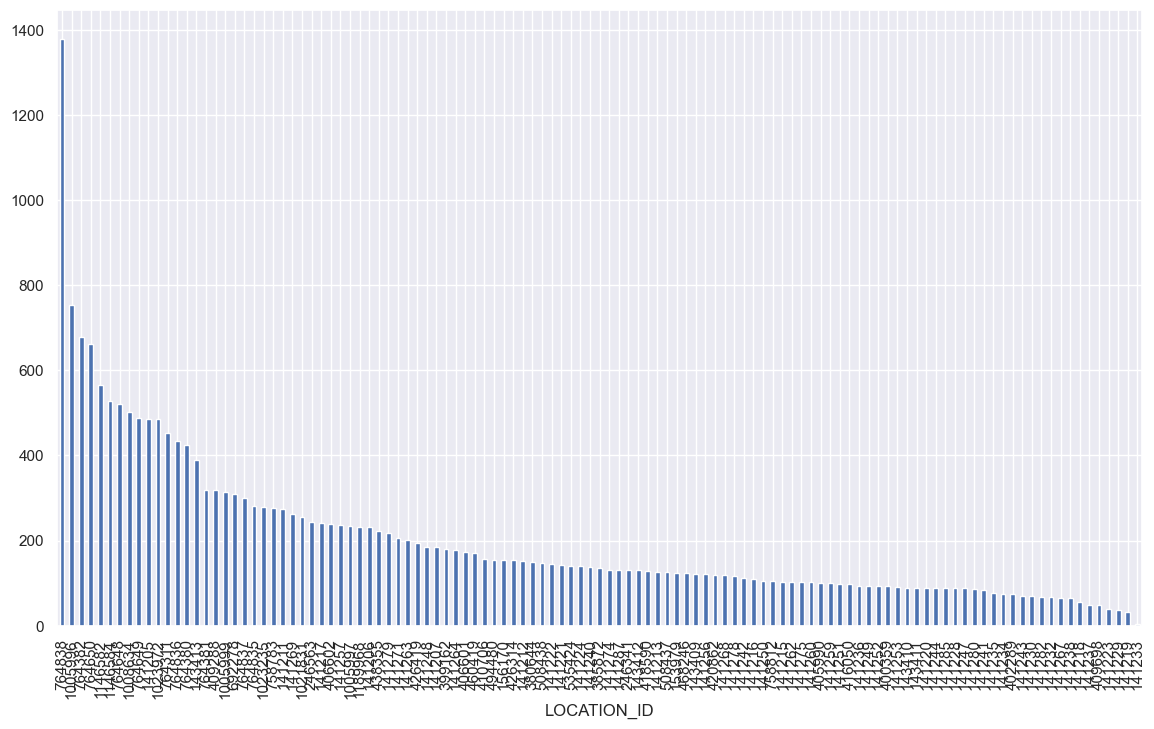

In [53]:
locations_ordered_daily_energy_sum['ENERGY_DELIVERED_KWH'].plot.bar()
locations_subset = locations_ordered_daily_energy_sum.index[:10]

In [56]:
locations_subset

Int64Index([ 764838, 1005996,  764382,  764650, 1146582, 1146584,  764648,
            1008634,  764649,  141205],
           dtype='int64', name='LOCATION_ID')

In [57]:
df_daily_subset = df_daily[df_daily.index.get_level_values(GROUP_LEVEL).isin(locations_subset)]
df_daily_subset = df_daily_subset.reindex(locations_subset, level=0)

In [58]:
df_daily_subset.index.levels[0]

Int64Index([ 764838, 1005996,  764382,  764650, 1146582, 1146584,  764648,
            1008634,  764649,  141205],
           dtype='int64', name='LOCATION_ID')

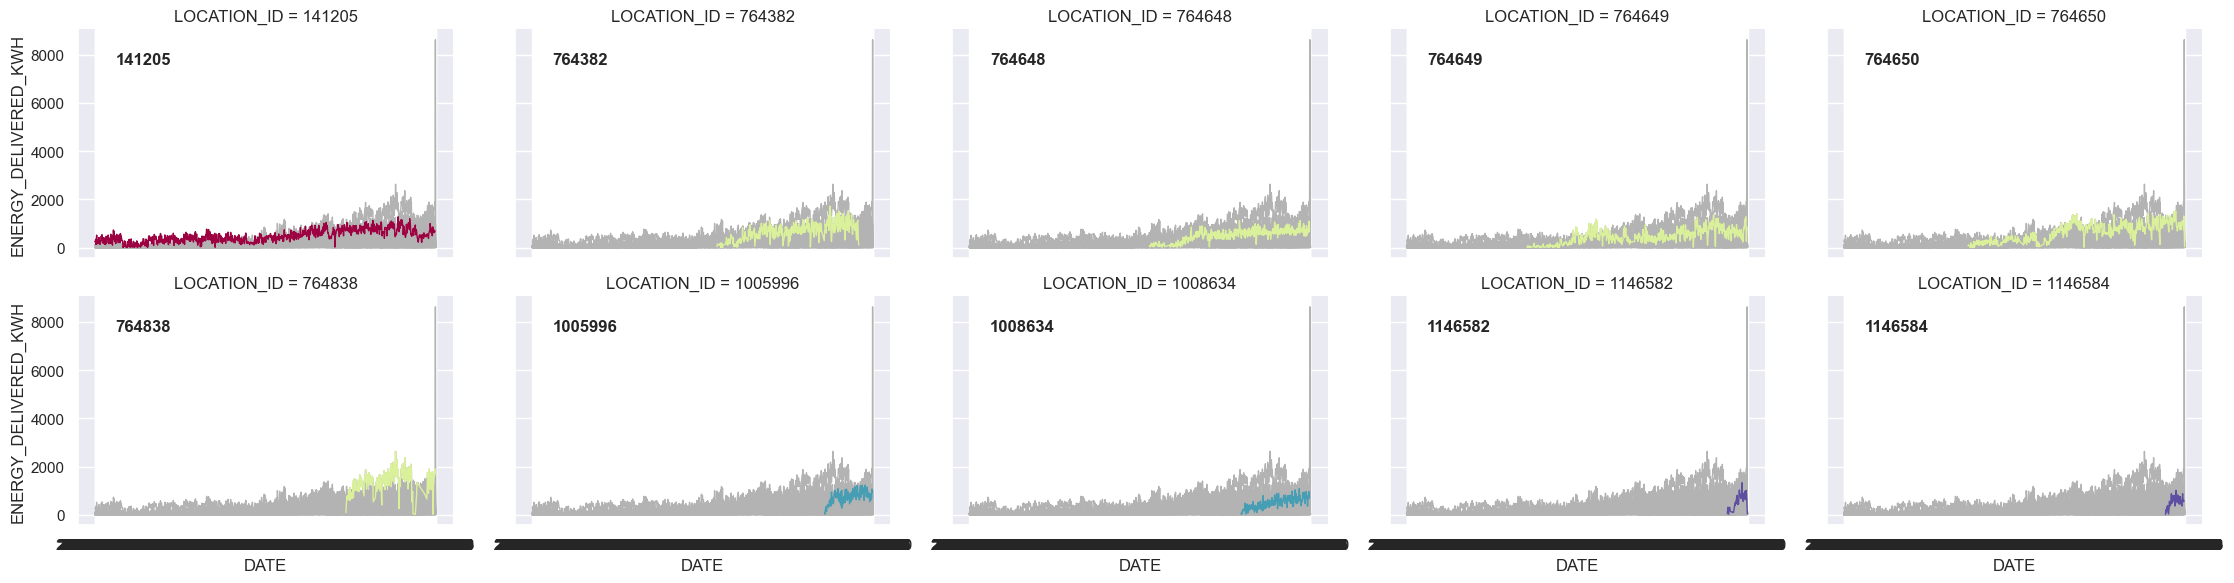

In [59]:
g = sns.relplot(data = df_daily_subset, x = "DATE", y = "ENERGY_DELIVERED_KWH",
                col = GROUP_LEVEL, hue = GROUP_LEVEL,
                kind = "line", palette = "Spectral",   
                linewidth = 1, zorder = 5,
                col_wrap = 5, height = 3, aspect = 1.5, legend = False
               )

#add text and silhouettes
for location in locations_subset:
    ax = g.axes_dict[location]
    ax.text(.1, .85, location,
            transform = ax.transAxes, fontweight="bold"
           )
    sns.lineplot(data = df_daily, x = "DATE", y = "ENERGY_DELIVERED_KWH", units=GROUP_LEVEL,
                 estimator = None, color= ".7", linewidth=1, ax=ax
                )

# ax.set_xticks('')
# g.set_titles("")
# g.set_axis_labels("", "ENERGY_DELIVERED_KWH")
g.tight_layout()
plt.show()

In [143]:
locations_ordered = df_locations['ENERGY_DELIVERED_KWH'].mean().sort_values(ascending=False)
locations_ordered

EVSE_ID
285103     388.397022
2517249    381.573805
2517247    369.750639
2517245    368.524045
2517217    364.254813
              ...    
2525694      2.196000
2484491      1.870000
2563863      1.596000
2517702      0.640000
2466088      0.540000
Name: ENERGY_DELIVERED_KWH, Length: 350, dtype: float64

Visualising the most active charging location delivery:

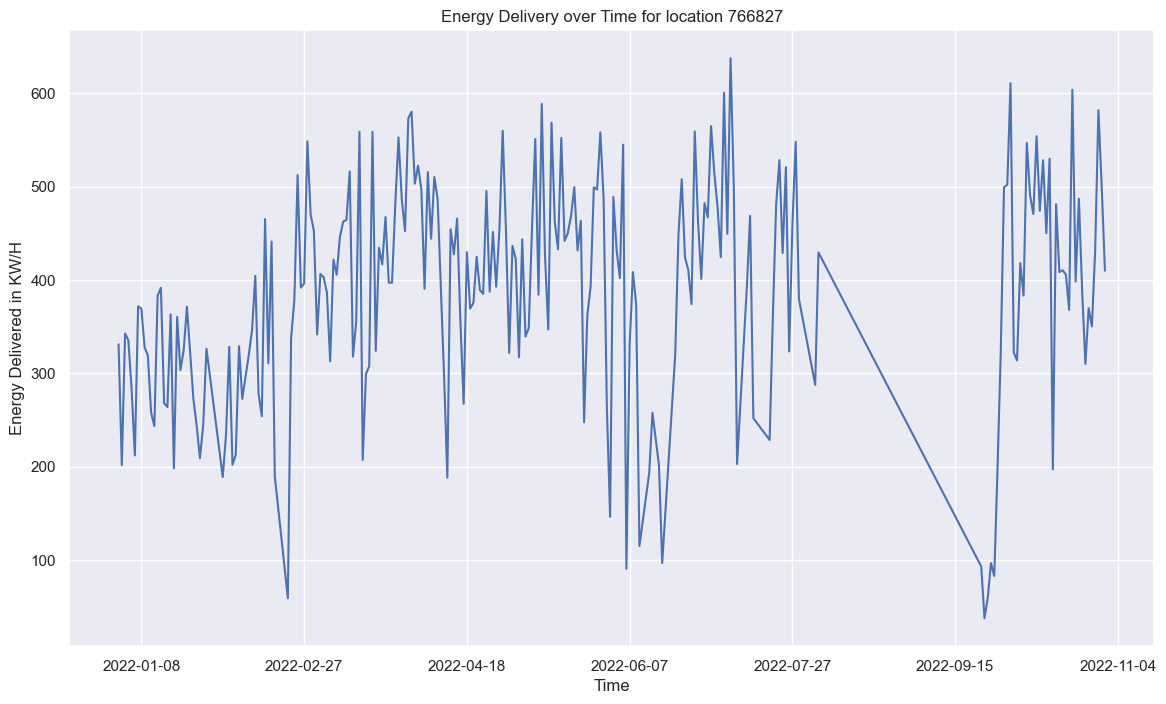

In [144]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=dict(list(df_locations))[locations_subset[0]], x ='DATE', y = 'ENERGY_DELIVERED_KWH')

ax.xaxis.set_major_locator(ticker.AutoLocator())
plt.ylabel('Energy Delivered in KW/H')
plt.xlabel('Time')
plt.title("Energy Delivery over Time for location 766827")
plt.show()

Visualising all locations by average daily charging demand

In [145]:
locations = pd.read_csv("../data/raw/GB_shell_recharge_locations.csv")

In [146]:
locations['LOCATION_SUB_TYPE'].value_counts()

On Street       5975
On Forecourt     120
Destination       40
Mobility Hub       1
Name: LOCATION_SUB_TYPE, dtype: int64

In [147]:
filtered_locs = locations[locations[GROUP_LEVEL] in locations_ordered.index]

KeyError: 'EVSE_ID'

In [ ]:
locations.index = locations[GROUP_LEVEL]

In [ ]:
locations_filtered = locations[locations.index.isin(locations_ordered.index)]

In [ ]:
locations_filtered['LOCATION_SUB_TYPE'].value_counts()